<a href="https://colab.research.google.com/github/R-802/LING-226-Assignments/blob/main/Assignment_One.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LING226 2023 T3 Assignment One
- Shemaiah Rangitaawa `300601546`
- Attempting Challenge

**Note:** Given the computationally demanding tasks in some parts of this notebook, operating in a GPU-based runtime environment is beneficial. However, it's not mandatory, as I have tried to include as much detail as possible in my discussions. This notebook also uses certain features exclusive to Google Colab, in particular its form functionality. However, this too is not required.

In [ ]:
import string
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt', quiet=True)

def clean_text(text, stop_words=None, remove_punctuation=True, to_lowercase=True):
    if to_lowercase:
        text = text.lower()

    if remove_punctuation:
        text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize the text
    words = word_tokenize(text)

    # Filter out stop words
    filtered_words = [word for word in words if word not in stop_words]

    # Rejoin the words into a processed text
    return ' '.join(filtered_words)

## **Text Preprocessing**

In [ ]:
def preprocess_tf(text, stop_words, min_freq=1, max_freq=float('inf')):
    text = clean_text(text, stop_words)
    words = word_tokenize(text)
    frequency = Counter(words)
    filtered_words = [word for word in words if min_freq <= frequency[word] <= max_freq]
    return ' '.join(filtered_words)

## **Text Metrics**

In [ ]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist
from collections import Counter

nltk.download('punkt', quiet=True)

def lexical_diversity(words):
    return len(set(words)) / len(words) if words else 0

def text_metrics(text):
    # Tokenization and basic processing
    words = word_tokenize(text.lower())
    overall_lexical_diversity = lexical_diversity(words)
    num_words = len(words)
    unique_words = len(set(words))

    # Sentence tokenization
    sentences = sent_tokenize(text)

    # Lexical diversity per sentence
    sentence_diversities = []
    for sentence in sentences:
        words_in_sentence = word_tokenize(sentence.lower())
        sentence_diversity = lexical_diversity(words_in_sentence)
        sentence_diversities.append(sentence_diversity)

    # Average lexical diversity of sentences
    avg_sentence_lexical_diversity = sum(sentence_diversities) / len(sentence_diversities) if sentence_diversities else 0

    # Top ten most frequent words
    top_ten_words = Counter(words).most_common(10)

    num_sentences = len(sentences)

    # Frequency Distribution
    freq_distribution = FreqDist(words)

    return {
        'num_words': num_words,
        'lexical_diversity': overall_lexical_diversity,
        'avg_sentence_lexical_diversity': avg_sentence_lexical_diversity,
        'top_ten_words': top_ten_words,
        'num_sentences': num_sentences,
        'frequency_distribution': freq_distribution
    }

###**Formatting Function for Text Metrics**

In [ ]:
def format_metrics(titles, metrics_list, is_preprocessed=True):
    for title, metrics in zip(titles, metrics_list):
        if metrics['top_ten_words']:
            formatted_top_words = ', '.join([f"'{word}' ({freq})" for word, freq in metrics['top_ten_words']])
            highest_word, highest_freq = metrics['top_ten_words'][0]  # Extracting the highest frequency word and its frequency
        else:
            formatted_top_words = "None"
            highest_word, highest_freq = ("N/A", 0)

        # Formatting the diversities as percentages
        overall_diversity_percentage = metrics['lexical_diversity'] * 100
        avg_sentence_diversity_percentage = metrics['avg_sentence_lexical_diversity'] * 100

        print(f"--------- Text Metrics for {title} ---------")
        print(f"Total Words: {metrics['num_words']}")
        if not is_preprocessed:
            print(f"Total Sentences: {metrics['num_sentences']}")
            print(f"Average Lexical Diversity of Sentences: {avg_sentence_diversity_percentage:.2f}%")
        print(f"Overall Lexical Diversity: {overall_diversity_percentage:.2f}%")
        print(f"Top Ten Most Frequent Words: {formatted_top_words}")
        print(f"Highest Frequency Word: '{highest_word}' (Frequency: {highest_freq})")
        print()

# **Experimentation And Disscussion**

**Notes:** I have chosen to use the NLTK's stopword list for preprocessing.

In [ ]:
# @title ##**Importing and Reading `TP001.txt`, `TP002.txt` from URL and `austen-emma.txt` from NLTK corpora** {display-mode: "form"}
# @markdown It's only required to run this cell once. This cell is dedicated to importing `TP001.txt`, `TP002.txt`, and `austen-emma.txt` for processing. Spellcheck is performed on `TP001.txt`, `TP002.txt` to ensure consistency.
!wget 'https://raw.githubusercontent.com/scskalicky/LING-226-vuw/main/the-current/tp001.txt'
!wget 'https://raw.githubusercontent.com/scskalicky/LING-226-vuw/main/the-current/tp002.txt'
!pip install symspellpy

import pkg_resources
from nltk.corpus import gutenberg
from symspellpy import SymSpell, Verbosity

nltk.download('gutenberg', quiet=True)

def read_comments_from_file(filepath):
    with open(filepath, 'r', encoding='utf-8') as file:
        return " ".join(line.split('\t')[1].strip() for line in file if '\t' in line)

def spellcheck(text):
    # Initialize SymSpell
    symspell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)
    dictionary_path = pkg_resources.resource_filename("symspellpy", "frequency_dictionary_en_82_765.txt")
    symspell.load_dictionary(dictionary_path, term_index=0, count_index=1)

    # Tokenize the input text
    words = text.split()
    corrected_text = []
    for word in words:
        # Get the best suggestion
        suggestions = symspell.lookup(word, Verbosity.CLOSEST, max_edit_distance=2)

        # Use the most likely suggestion, or the original word if no suggestion found
        if suggestions:
            corrected_word = suggestions[0].term
        else:
            corrected_word = word
        corrected_text.append(corrected_word)

    # Join the corrected words back into a string
    return ' '.join(corrected_text)

# Read and process the texts
tp001 = read_comments_from_file('tp001.txt')
tp002 = read_comments_from_file('tp002.txt')

# Using Emma by Jane Austen 1816
emma_text = gutenberg.raw('austen-emma.txt')

# Fix spelling
tp001_text = spellcheck(tp001)
tp002_text = spellcheck(tp002)

## **Initializing NLTK Stopwords**
I have also added some random words and characters that appeared during analysis and contributed little to the overall contents of the texts.

In [ ]:
import nltk
from nltk.corpus import stopwords

# Using stopwords from NLTK
nltk.download('stopwords', quiet=True)
stop_words = set(stopwords.words('english'))

# Additional words to the stopwords set
additional_stopwords = {'ä', 'å', 'pä',
                        'n', 's', 'r', 'tä', 'wä', 'thä', 'bä', 'ahhhhhhhhhhhh',
                        'hxbdjs', 'aga', 've', 'fhdvb', 'vvvvv'}
stop_words.update(additional_stopwords)

In [ ]:
# @title ##**Graphing Function Definition** {display-mode: "form"}
# @markdown Although `text_metrics` already returns a list of the top 10 words, for flexiblity, I instead decided to use the frequency distribution returned from `text_metrics` and extract the `n` most common words.

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from nltk.probability import FreqDist

def plot_word_frequency(metrics_list, n, titles, canvas_title):
    num_plots = len(metrics_list)
    fig = make_subplots(rows=num_plots, cols=1, subplot_titles=titles)
    for i, metrics in enumerate(metrics_list, start=1):
        # Extract frequency distribution and get the top n words
        freq_dist = metrics['frequency_distribution']
        word_freq = freq_dist.most_common(n)

        # Separate the words and their frequencies
        words = [wf[0] for wf in word_freq]
        frequencies = [wf[1] for wf in word_freq]

        # Create a colorscale with the same number of colors as the number of words
        colorscale = px.colors.sequential.Emrld_r[:len(words)]

        # Add the plot to the subplot
        fig.add_trace(
            go.Bar(
                x=frequencies,
                y=words,
                orientation='h',
                name=titles[i-1],
                marker=dict(
                    color=frequencies,
                    colorscale=colorscale
                )
            ),
            row=i, col=1
        )

    fig.update_layout(
        title=canvas_title,
        height=300 * num_plots,  # Adjust height based on number of plots
        showlegend=False
    )

    # Reverse the y-axis to show the highest frequency on top for each subplot
    for i in range(num_plots):
        fig.update_yaxes(autorange="reversed", row=i + 1, col=1)

    # Show the plot
    fig.show()

## **Analysis and Overview of Key Metrics from Sample Texts Before and After Pre-processing**




In [ ]:
# @title Raw Text Metrics {display-mode: "form"}
# @markdown

# Get text metrics for raw unprocessed text
emma_metrics = text_metrics(emma_text)
tp001_metrics = text_metrics(tp001_text)
tp002_metrics = text_metrics(tp002_text)

# Prepare titles and metrics for the formatting
titles = ["Emma - Raw Text", "Ban Petrol Cars by 2030 (TP001) - Raw Text", "Sustainable Fish Sales (TP002) - Raw Text"]
metrics_list = [emma_metrics, tp001_metrics, tp002_metrics]
format_metrics(titles, metrics_list, is_preprocessed=False)

--------- Text Metrics for Emma - Raw Text ---------
Total Words: 191781
Total Sentences: 7493
Average Lexical Diversity of Sentences: 90.32%
Overall Lexical Diversity: 4.14%
Top Ten Most Frequent Words: ',' (12016), '.' (6351), 'the' (5201), 'to' (5181), 'and' (4877), 'of' (4284), 'i' (3177), 'a' (3124), '--' (3100), 'it' (2503)
Highest Frequency Word: ',' (Frequency: 12016)

--------- Text Metrics for Ban Petrol Cars by 2030 (TP001) - Raw Text ---------
Total Words: 39665
Total Sentences: 101
Average Lexical Diversity of Sentences: 55.22%
Overall Lexical Diversity: 9.48%
Top Ten Most Frequent Words: 'the' (1572), 'to' (1503), 'a' (1119), 'and' (979), 'we' (896), 'of' (760), 'it' (735), 'be' (729), 'is' (694), 'for' (634)
Highest Frequency Word: 'the' (Frequency: 1572)

--------- Text Metrics for Sustainable Fish Sales (TP002) - Raw Text ---------
Total Words: 149382
Total Sentences: 533
Average Lexical Diversity of Sentences: 62.66%
Overall Lexical Diversity: 5.53%
Top Ten Most Frequ

In [ ]:
# Plot the top 10 words from each text
plot_word_frequency(metrics_list, 10, titles, "Top 10 Words From Raw Texts")

###**Analysis of Raw Unprocessed Texts**
**Emma by Jane Austen**

The metrics confirm the characteristics of a classic novel: extensive length, a high number of sentences, and a low overall lexical diversity, which is typical for long narratives. The high average lexical diversity per sentence reflects Jane Austen's varied and rich use of language within individual sentences.

**TP001 (Petrol cars should be banned by 2030)**

The shorter length and significantly higher overall lexical diversity compared to "Emma" suggest diverse viewpoints and varied vocabulary used by different respondents. The lower average lexical diversity per sentence could be due to more straightforward, argumentative sentence structures typical in responses or opinions. The frequent use of words like 'we', 'be', and 'for' indicates a focus on collective action and future-oriented propositions.

**TP002 (Supermarkets should only sell sustainably caught fish)**

This text is longer than TP001, possibly indicating more detailed responses or larger numbers of contributors. The presence of 'fish' among the most frequent words directly reflects the topic. The overall and average lexical diversities suggest a balance between varied vocabulary and straightforward sentence structures, possibly due to the mix of technical terms and general argumentative language in the responses.

Overall, the raw text metrics show that the three texts have different characteristics. Emma has the highest number of words and sentences, while TP001 has the lowest. TP001 also has the highest lexical diversity, while Emma has the lowest. The most frequent word in all three texts is 'the', which is expected in raw texts.

**Top 10 Words from Raw Texts**

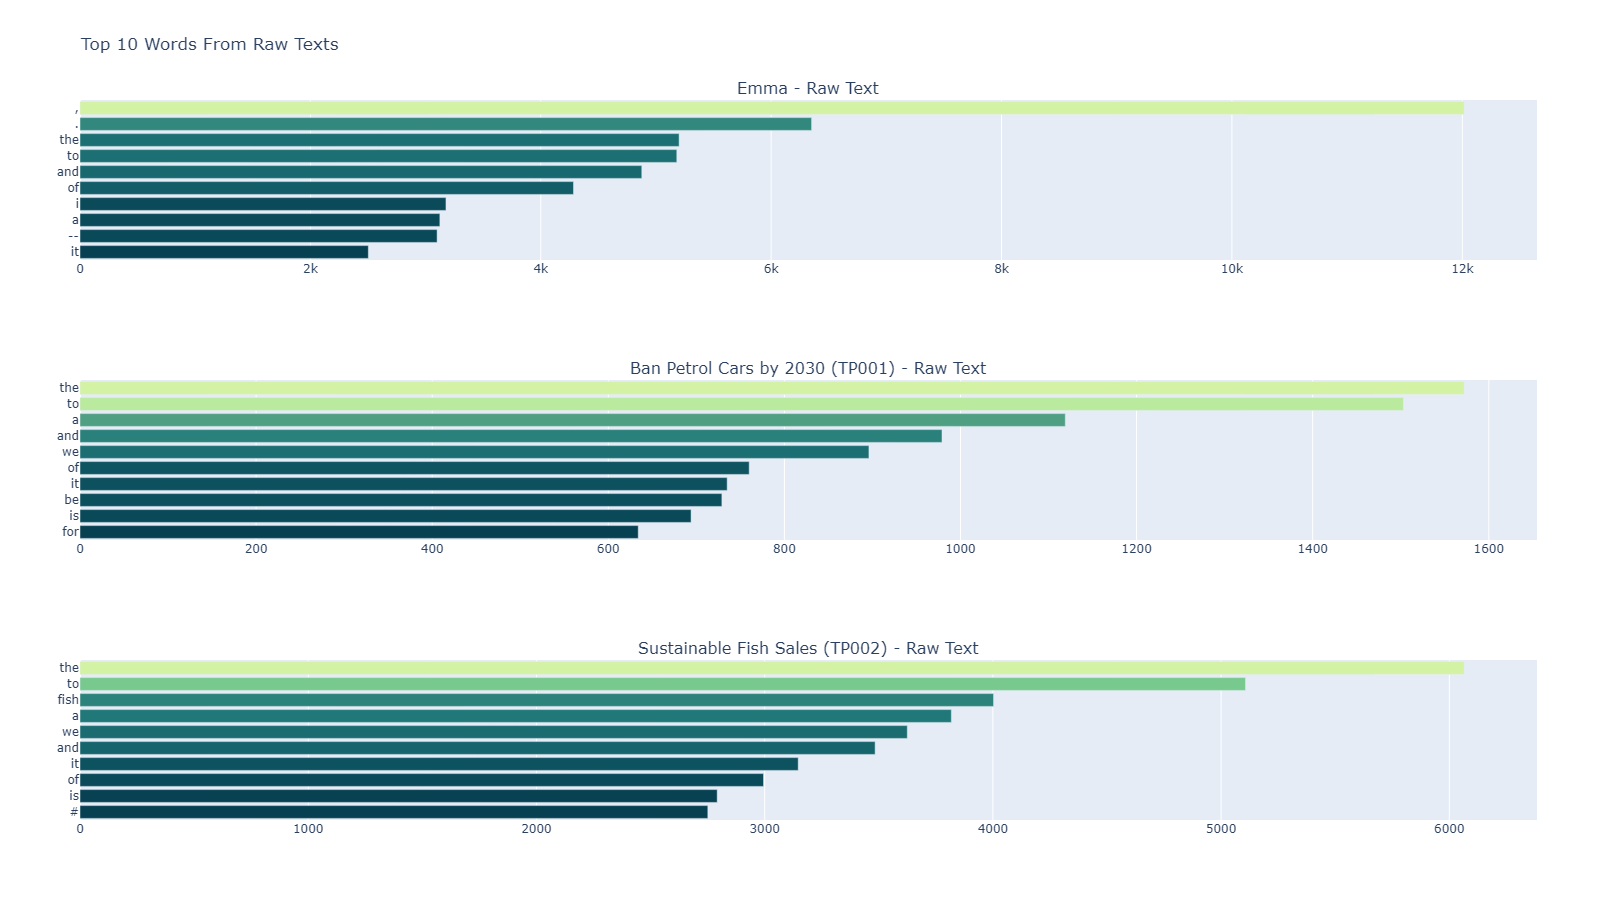

For "Emma," the graph shows a high frequency of the most common English words like 'the', 'to', 'and', 'of', and 'a'. This is typical for unprocessed English-language texts, as these words are often the glue that holds sentences together. The substantial frequency of these words suggests a rich narrative style, which is expected in a classic novel that utilizes complex sentence structures and descriptive passages.

In "TP001," the frequencies of the top words are noticeably lower than in "Emma," yet 'the' remains the most common. The presence of words like 'we', 'be', 'is', and 'for' indicate a more conversational or argumentative text, reflecting discourse on a topic where personal opinions, suggestions, and reasoning are prominent.

"TP002" shows a unique inclusion of the word 'fish', which stands out against the backdrop of otherwise common English words. The word 'fish' having a high frequency immediately suggests the subject matter, which is the sustainablity of fish sales.

The graph also illustrates the difference in vocabulary richness and text length among the three texts. "Emma" appears to have a much higher word count, reflective of its status as a novel, whereas "TP001" and "TP002" have fewer words, which may point to them being shorter texts like essays or articles.

Overall, the unprocessed word frequencies provide a foundational understanding of each text's content and style. The frequent appearance of common words is expected, but the presence of specific terms like 'fish' in "TP002" offers a hint of the text's thematic focus. This baseline data plays a critical role in subsequent phases of text analysis and proved particularly valuable in the following section, which involved experimentation with and determination of word frequency thresholds for removal.

---

In [ ]:
# @title Preprocessing {display-mode: "form"}
# @markdown These sliders were designed to help select the ideal frequency range for text removal during preprocessing. The "upper bound" (ub) setting is used for excluding overly common words that aren't stopwords from the analysis. When a word's frequency exceeds this upper limit, it is removed from the text.
# @markdown
# @markdown The "lower bound" (lb) setting targets infrequently used words. Words that appear less often than this lower threshold are considered too rare to be relevant and are thus excluded. These might include typographical errors, extremely niche terms, or words that are highly specific to the text's context.

# Upper and lower bounds for word removal
emma_ub = 4685 # @param {type:"slider", min:1, max:5000, step:5}
emma_lb = 125 # @param {type:"slider", min:1, max:5000, step:5}
tp001_ub = 2950 # @param {type:"slider", min:1, max:5000, step:5}
tp001_lb = 375 # @param {type:"slider", min:1, max:5000, step:5}
tp002_ub = 3615 # @param {type:"slider", min:1, max:5000, step:5}
tp002_lb = 300 # @param {type:"slider", min:1, max:5000, step:5}

# Preprocess the texts
tf_emma = preprocess_tf(emma_text, stop_words, 100, 5000)
tf_tp001 = preprocess_tf(tp001_text, stop_words, 10, 800)
tf_tp002 = preprocess_tf(tp002_text, stop_words, 10, 2000)

# Get text metrics
tf_emma_metrics = text_metrics(tf_emma)
tf_tp001_metrics = text_metrics(tf_tp001)
tf_tp002_metrics = text_metrics(tf_tp002)

# Prepare titles and metrics for printing
tf_titles = ["Emma - Pre-processed Text", "Ban Petrol Cars by 2030 (TP001) - Pre-processed Text", "Sustainable Fish Sales (TP002) - Pre-processed Text"]
tf_metrics_list = [tf_emma_metrics, tf_tp001_metrics, tf_tp002_metrics]
format_metrics(tf_titles, tf_metrics_list)

--------- Text Metrics for Emma - Pre-processed Text ---------
Total Words: 24462
Overall Lexical Diversity: 0.43%
Top Ten Most Frequent Words: 'mr' (1124), 'could' (830), 'would' (817), 'emma' (751), 'mrs' (687), 'miss' (587), 'must' (567), 'much' (474), 'said' (474), 'one' (428)
Highest Frequency Word: 'mr' (Frequency: 1124)

--------- Text Metrics for Ban Petrol Cars by 2030 (TP001) - Pre-processed Text ---------
Total Words: 13603
Overall Lexical Diversity: 2.46%
Top Ten Most Frequent Words: 'cars' (562), 'petrol' (394), 'environment' (334), 'need' (331), 'think' (283), 'electric' (264), 'change' (227), 'better' (213), 'planet' (208), 'good' (206)
Highest Frequency Word: 'cars' (Frequency: 562)

--------- Text Metrics for Sustainable Fish Sales (TP002) - Pre-processed Text ---------
Total Words: 52923
Overall Lexical Diversity: 1.64%
Top Ten Most Frequent Words: 'think' (1251), 'need' (1178), 'sustainable' (953), 'future' (899), 'would' (832), 'good' (789), 'people' (717), 'done' (

In [ ]:
# Plot the top 10 words from each text
plot_word_frequency(tf_metrics_list, 10, tf_titles, "Top 10 Words From Pre-processed Texts")

###**Analysis of Results and Effects of Preprocessing the Texts**
**Emma**

The preprocessing of Jane Austen's "Emma" often led to a noticeable decrease in both the total word count and the overall lexical diversity. This reduction in lexical diversity indicates that the text is now predominantly composed of a limited range of words. A striking feature of this condensed version is the repeated appearance of character names such as 'Emma' and 'Harriet.' Their prominence reveals that the narrative is centered around these key figures.

Additionally, the frequent usage of words like 'could', 'would', and 'must' mirrors the speculative and reflective tone of the novel. These words suggest a focus on the characters' internal deliberations and the hypothetical scenarios they consider, especially in their social interactions and personal musings. However, this narrowed lexical range also implies that the preprocessing may have inadvertently stripped away much of Austen's linguistic richness. As a result, some of the subtleties and less common words that add depth and nuance to her writing might have been lost. This loss potentially affects the intricate layers and the full essence of the original text, which is characterized by its rich and varied vocabulary.

**TP001**

The preprocessed version of TP001, focusing on the topic of banning petrol cars by 2030, shows a notably higher lexical diversity (2.46%) compared to "Emma". This higher diversity could be attributed to the inclusion of more specialized vocabulary pertinent to environmental issues and automobile technology. The text is dominated by words like 'cars', 'petrol', 'environment', and 'electric', clearly reflecting its environmental theme. The presence of words such as 'need', 'think', 'change', 'better', and 'good' points towards a text that is not just descriptive but also persuasive, likely advocating for environmental action or policy change. These words suggest an opinionated nature of the text, possibly comprising arguments, suggestions, or reflections on the environmental impact of petrol cars and the potential benefits of electric vehicles. The lexical choices paint a picture of a discourse deeply engaged in environmental concerns, echoing contemporary debates on sustainable practices and technological shifts in transportation.

**TP002**

The preprocessing of TP002, center around the topic of selling only sustainably caught fish, results in a text with a relatively high word count of 52,923 and a lexical diversity of 1.64%. The most frequent words, such as 'think', 'need', 'sustainable', 'future', 'would', and 'environment', highlight the text’s focus on sustainability, particularly in the context of future planning and environmental conservation. The word 'think' appears 1,251 times, suggesting a reflective or opinion-based nature of the text, likely containing personal viewpoints or collective sentiments about sustainability. The diverse use of terms like 'good', 'people', 'done', 'better', and 'environment' indicates a comprehensive discussion encompassing various aspects of sustainability, from individual responsibilities to broader societal impacts. This lexical analysis points to a text rich in ideas and perspectives on sustainability, possibly including debates, suggestions, and reflections on sustainable practices in the context of environmental preservation and future generations' well-being.

**Top 10 Words After Pre-processing**

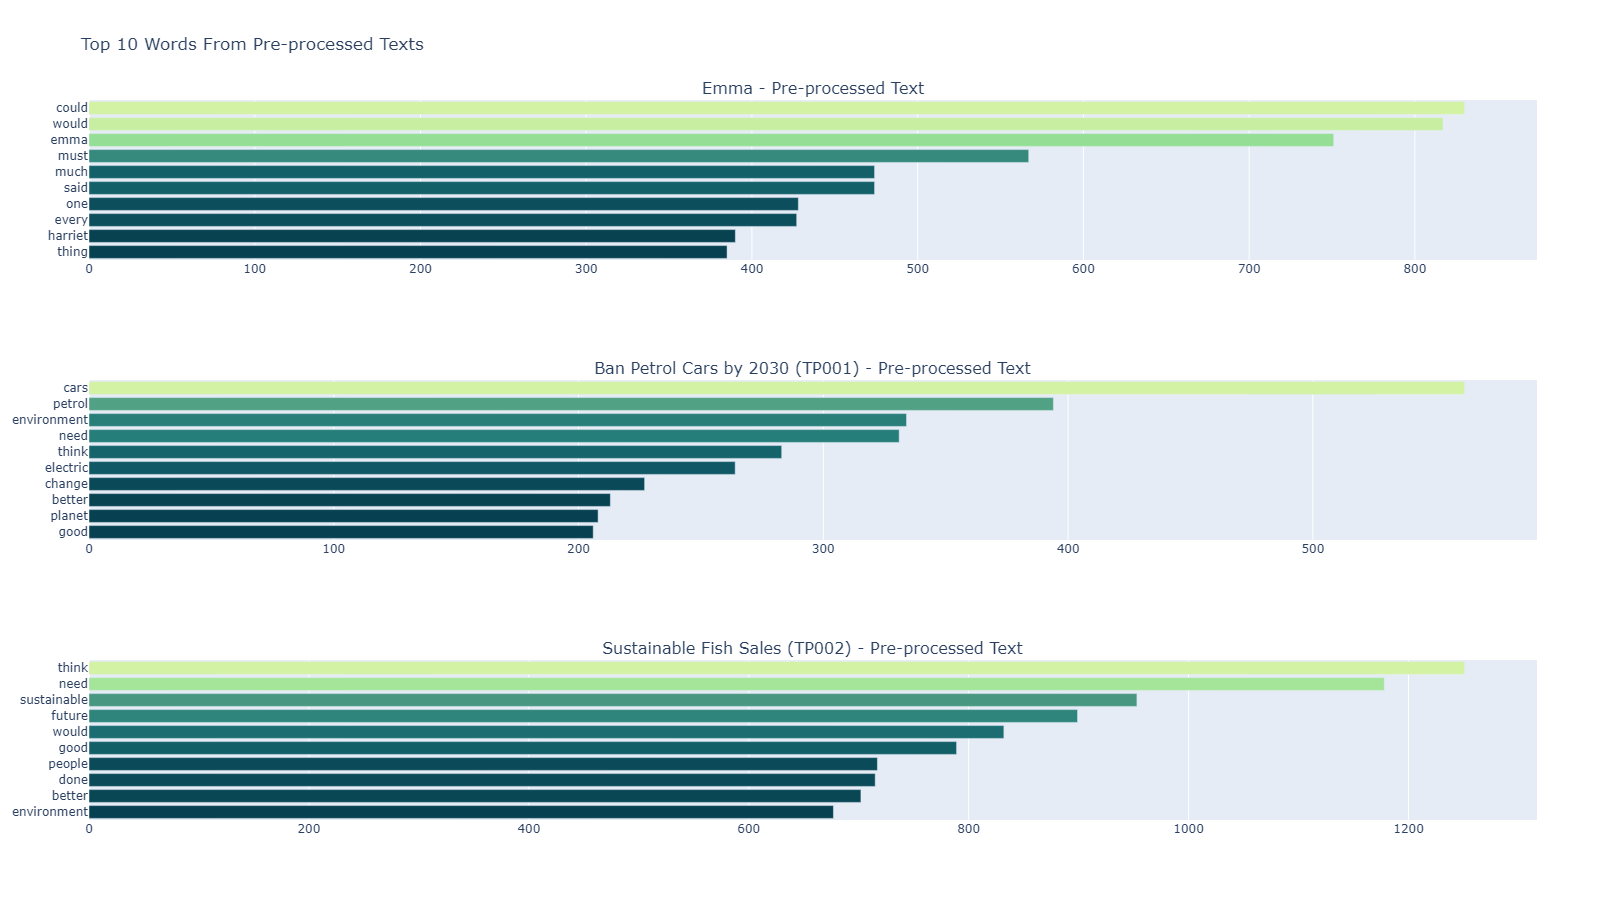

Graphing the top 10 most frequent words from the pre-processed texts of "Emma," "TP001," and "TP002." highlights the prevalence of specific words in each text, indicating key thematic focuses. "Emma" shows character names and modal verbs like 'could' and 'would' as most frequent, underscoring character-centric narrative and introspective content. "TP001" centers around 'cars' and environmental terms, reflecting a discourse on automotive impact and environmental considerations. "TP002" features 'think' and 'sustainable' among the top, suggesting a reflective discussion on sustainability. The word frequencies across the texts vary, with "TP002" showing the highest frequency counts, indicating a broader discussion or larger dataset.

# **Further Experimentation (Challenge)**
The following experimentation section includes:
- An analysis and overview of metrics from both sample texts.  
- Visualization of the top ten words before and after both processing methods.
- Analysis of Emma's overall lexical diversity before and after processing.

## **Text Preprocessing Using Term Frequency - Inverse Document Frequency (TF-IDF) Filtering**
This function is based on the principle of refining a text corpus to enhance the salience of its content for computational analysis. It operates on the premise that the most informative words in a document are neither too common across the entire corpus (as they do not provide unique information) nor too rare (as they may not contribute significantly to the overall understanding of the content). The process of TF-IDF itself transforms textual information into a numerical format suitable for machine learning models, attributing to each word a weight that reflects its importance.

The TF-IDF vectorization at the core of this function scores each word based on its term frequency (TF), the number of times a word appears in a document, tempered by its inverse document frequency (IDF), which diminishes the weight of terms that occur very frequently across the corpus. This scoring mechanism inherently balances the need to recognize important terms within individual documents against the need to filter out terms that are too commonplace to be distinctive or too unusual to be characteristic. By summing the TF-IDF scores for each term across all documents, the function assesses the overall importance of each term within the entire corpus.

The subsequent filtering process is where I have slightly customized the TF-IDF approach by imposing percentile thresholds, essentially slicing away the upper and lower extremes of the term weight spectrum.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

def preprocess_tf_idf(texts, stop_words, idf_percentile_lower=10, idf_percentile_upper=90):

    # Tokenize and clean each document
    clean_docs = [clean_text(text, stop_words) for text in texts]

    # Create a TF-IDF Vectorizer
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(clean_docs)

    # Get feature names and TF-IDF score
    feature_names = vectorizer.get_feature_names_out()
    tfidf_scores = np.asarray(tfidf_matrix.sum(axis=0)).flatten()

    # Calculate percentile thresholds
    lower_threshold = np.percentile(tfidf_scores, idf_percentile_lower)
    upper_threshold = np.percentile(tfidf_scores, idf_percentile_upper)

    # Filter words based on TF-IDF scores
    filtered_words = [feature_names[i] for i in range(len(feature_names))
                      if lower_threshold <= tfidf_scores[i] <= upper_threshold]

    # Reconstruct the documents using filtered words
    preprocessed_texts = []
    for doc in clean_docs:
        words = doc.split()
        preprocessed_texts.append(" ".join([word for word in words if word in filtered_words]))

    return preprocessed_texts

## **Text Preprocessing Using a Novel Approach to Context-based Filtering**
The strategy employed in this text preprocessing pipeline centers on preserving the essence and relevance of the text while eliminating extraneous or irrelevant content. This approach attempts to aligns with the overarching objective of distilling text to its most significant elements, ensuring that the core themes and messages remain intact. By focusing on the crux of the text, it seeks to enhance the clarity and impact of the information conveyed.

#### **Emphasizing Contextual Relevance over Frequency**
A key component of this method is a shift away from traditional frequency-based analysis, which prioritizes words based on how often they appear, regardless of their contextual significance. Instead, this approach attempts to look deeper into the contextual relationships and meanings of terms within the text. By evaluating sentences for their semantic similarity to specific keywords or keyphrases, the method acknowledges the importance of context in understanding the relevance of words and phrases within a text. This technique is particularly adept at capturing the nuanced and semantic layers of language, which can be overlooked in simpler, frequency-centric approaches.

#### **Sentence-Level Semantic Filtering**
In this approach, I have attempted to achieve contextual relevance by first decomposing the text into individual sentences, followed by generating embeddings for each sentence. These embeddings are essentially rich, multi-dimensional representations capturing the semantic essence of each sentence. When these sentence embeddings are compared with predefined keyword embeddings through cosine similarity, the function effectively assesses the relevance of each sentence to the targeted topics or themes. This comparison is not a strict superficial matching of words but an evaluation of the sentence's thematic alignment with the keywords. Sentences that exhibit a high degree of similarity to the keywords, as determined by the predefined threshold, are retained. This threshold acts as a crucial gatekeeper, ensuring that only content closely aligned with the primary themes is included in the processed text.

However, there are a few drawbacks to this approach. Firstly, computational complexity: The process of generating and comparing embeddings for each sentence can be computationally intensive, especially for longer texts such as Emma. This often leads to longer processing times which require more compute resources.

Secondly, dependence on the quality of embeddings: The effectiveness of this method heavily relies on the quality of the sentence and keyword embeddings. If these embeddings do not accurately capture the semantic nuances of the text, the similarity assessment can be misleading.

Additionally, setting an appropriate threshold for similarity can be challenging. If the threshold is set too high, important sentences might be excluded; too low, and the filtered text could still contain irrelevant information.

In [ ]:
import torch
from transformers import BertTokenizer, BertModel

# Setting up the device for GPU usage
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Loading the tokenizer and model
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name).to(device)

# Checking if CUDA is available and getting the GPU device name
cuda_available = torch.cuda.is_available()
gpu_name = torch.cuda.get_device_name(0) if cuda_available else "No CUDA Device Available"

cuda_available, gpu_name

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

(True, 'Tesla T4')

In [ ]:
# Function to create BERT embeddings
def create_embeddings(text, model=model, tokenizer=tokenizer, device='cuda'):
    inputs = tokenizer(text, padding=True, truncation=True, return_tensors="pt", max_length=512, add_special_tokens=True)
    inputs = {key: val.to(device) for key, val in inputs.items()}

    model.eval()

    with torch.no_grad():
        outputs = model(**inputs)

    hidden_states = outputs.last_hidden_state
    text_embedding = hidden_states.mean(dim=1).squeeze(0)

    return text_embedding

In [ ]:
from nltk.tokenize import sent_tokenize
import torch.nn.functional as F

# Main function to preprocess text
def preprocess(text, keyword_embeddings, stop_words, threshold=0.5):
    sentences = sent_tokenize(text)
    filtered_sentences = []

    for sentence in sentences:
        sentence_embedding = create_embeddings(sentence)
        similarities = [F.cosine_similarity(
                            sentence_embedding.unsqueeze(0),
                            keyword_emb.unsqueeze(0), dim=1)
                            for keyword_emb in keyword_embeddings]

        # Check if any similarity is above the threshold
        similarity_above_threshold = any(similarity > threshold for similarity in similarities)

        # Retain the sentence if similarity is above the threshold
        if similarity_above_threshold:
            filtered_sentences.append(sentence)

    processed_text = ' '.join(filtered_sentences)

    # Clean text after removing words
    return clean_text(processed_text, stop_words)

### **Keyword Extraction**

Using [KeyBERT](https://github.com/MaartenGr/KeyBERT) for keyword extraction.

In [ ]:
!pip install keybert
!pip install sentence_transformers

In [ ]:
from keybert import KeyBERT
import torch

# Initialize KeyBERT model
kw_model = KeyBERT()

def extract_keywords(text, num_keywords=5, diversify=False, diversity=0.5):
    keyphrase_ngram_range = (3, 3)
    stop_words = 'english'

    # Extract keywords
    if diversify:
        keywords = kw_model.extract_keywords(text, keyphrase_ngram_range=keyphrase_ngram_range,
                                            stop_words=stop_words, use_mmr=True, diversity=diversity)
    else:
        keywords = kw_model.extract_keywords(text, keyphrase_ngram_range=keyphrase_ngram_range,
                                            stop_words=stop_words, use_maxsum=True,
                                            nr_candidates=20, top_n=num_keywords)

    # Extract just the keywords (first element of each tuple)
    extracted_keywords = [keyword[0] for keyword in keywords]

    # Tokenize and encode extracted keywords in a batch
    key_word_tokens = tokenizer(extracted_keywords, padding=True, return_tensors="pt").to(device)

    with torch.no_grad():
        key_word_outputs = model(**key_word_tokens)
    key_word_embeddings = key_word_outputs.last_hidden_state.mean(dim=1)

    return {
        'key_word_embeddings': key_word_embeddings,
        'keywords': extracted_keywords
    }

##**Analyzing Pre-processed Texts Using TF-IDF Based Filtering**

In [ ]:
# Preprocess the texts using TF-IDF
texts = [tp001_text, tp002_text, emma_text]
preprocessed_texts = preprocess_tf_idf(texts, stop_words)
tf_idf_tp001 = preprocessed_texts[0]
tf_idf_tp002 = preprocessed_texts[1]
tf_idf_emma = preprocessed_texts[2]

# Calculate metrics for each preprocessed text
tf_idf_tp001_metrics = text_metrics(tf_idf_tp001)
tf_idf_tp002_metrics = text_metrics(tf_idf_tp002)
tf_idf_emma_metrics = text_metrics(tf_idf_emma)

# Display formatted metrics
titles_tf_idf = ["TP001 - TF-IDF Preprocessed Text", "TP002 - TF-IDF Preprocessed Text", "Emma - TF-IDF Preprocessed Text"]
metrics_tf_idf = [tf_idf_tp001_metrics, tf_idf_tp002_metrics, tf_idf_emma_metrics]
format_metrics(titles_tf_idf, metrics_tf_idf)

--------- Text Metrics for TP001 - TF-IDF Preprocessed Text ---------
Total Words: 3445
Overall Lexical Diversity: 72.31%
Top Ten Most Frequent Words: 'warfare' (6), 'polite' (6), 'individual' (5), 'handle' (5), 'subsidies' (5), 'sets' (5), 'significant' (5), 'total' (5), 'breath' (5), 'fight' (5)
Highest Frequency Word: 'warfare' (Frequency: 6)

--------- Text Metrics for TP002 - TF-IDF Preprocessed Text ---------
Total Words: 12878
Overall Lexical Diversity: 51.09%
Top Ten Most Frequent Words: 'top' (19), 'choose' (19), 'thriving' (19), 'protection' (18), 'board' (18), 'ecology' (18), 'rights' (17), 'forever' (17), 'fishery' (17), 'sale' (16)
Highest Frequency Word: 'top' (Frequency: 19)

--------- Text Metrics for Emma - TF-IDF Preprocessed Text ---------
Total Words: 18428
Overall Lexical Diversity: 43.08%
Top Ten Most Frequent Words: 'miles' (16), 'anywhere' (16), 'laughing' (16), 'reached' (16), 'comprehend' (15), 'opening' (15), 'assistance' (15), 'compliments' (15), 'refuse' (1

##**Analyzing Texts Pre-processed with Context-Based Filtering**
This section is computationally and resource intensive, it can also take a while to run, typically under 4 minutes on a Tesla T4 in the colab runtime environment. It can be skipped, as I have dissused the results in other parts of this notebook.

In [ ]:
# Extracting keywords for preprocessing
num_tp001_keywords = 7
tp001_keywords = extract_keywords(tp001_text, num_tp001_keywords)
print(tp001_keywords['keywords'])

num_tp002_keywords = 8
tp002_keywords = extract_keywords(tp002_text, num_tp002_keywords)
print(tp002_keywords['keywords'])

['sustainable alternative need', 'impact banning petrol', 'think banning cars', 'reduce emissions need', 'climate change ban', 'sustainable change better', 'banned 2030 environment']
['investing sustainable fishing', 'sustainable fishing economy', 'fishing allowed sustainability', 'paying sustainable fishing', 'sustainable continue fishing', 'sustainable fishing priority', 'sell sustainable fishing', 'idea sustainable fishing']


In [ ]:
num_emma_keywords = 25

# Utilizing MMR and high diversification in an attempt to increase the contextual scope of the keyphrases
emma_keywords = extract_keywords(emma_text, num_emma_keywords, diversify=True, diversity=0.7)
print(emma_keywords['keywords'])

emma_keyword_embeddings = emma_keywords['key_word_embeddings']
tp001_keyword_embeddings = tp001_keywords['key_word_embeddings']
tp002_keyword_embeddings = tp002_keywords['key_word_embeddings']

['unsuspected emma circumstances', 'father inherited constitution', 'comfortable command command', 'income comparison enscombe', 'brewing spruce beer']


In [ ]:
# Preprocess TP001 text
preprocessed_tp001 = preprocess(tp001_text, tp001_keyword_embeddings, stop_words)
preprocessed_tp001_metrics = text_metrics(preprocessed_tp001)
format_metrics(["TP001 - Context-based Preprocessing"], [preprocessed_tp001_metrics])

# Preprocess TP002 text
preprocessed_tp002 = preprocess(tp002_text, tp002_keyword_embeddings, stop_words)
preprocessed_tp002_metrics = text_metrics(preprocessed_tp002)
format_metrics(["TP002 - Context-based Preprocessing"], [preprocessed_tp002_metrics])

# Preprocess Emma text
preprocessed_emma = preprocess(emma_text, emma_keyword_embeddings, stop_words)
preprocessed_emma_metrics = text_metrics(preprocessed_emma)
format_metrics(["Emma - Context-based Preprocessing"], [preprocessed_emma_metrics])

--------- Text Metrics for TP001 - Context-based Preprocessing ---------
Total Words: 19975
Overall Lexical Diversity: 18.04%
Top Ten Most Frequent Words: 'cars' (560), 'petrol' (392), 'environment' (334), 'need' (330), 'think' (283), 'electric' (263), 'change' (227), 'better' (212), 'planet' (208), 'good' (206)
Highest Frequency Word: 'cars' (Frequency: 560)

--------- Text Metrics for TP002 - Context-based Preprocessing ---------
Total Words: 63204
Overall Lexical Diversity: 11.77%
Top Ten Most Frequent Words: 'fish' (3605), 'think' (1127), 'need' (1035), 'sustainable' (885), 'future' (823), 'would' (765), 'good' (719), 'better' (640), 'people' (633), 'environment' (628)
Highest Frequency Word: 'fish' (Frequency: 3605)

--------- Text Metrics for Emma - Context-based Preprocessing ---------
Total Words: 44743
Overall Lexical Diversity: 16.72%
Top Ten Most Frequent Words: 'mr' (679), 'could' (590), 'would' (563), 'emma' (554), 'mrs' (416), 'miss' (373), 'must' (331), 'every' (297), 'o

## Top Ten Words Before and After Processing

The graphs provide a comparative analysis of the top ten words from three different texts: before any processing, after context-based preprocessing, and after TF-IDF preprocessing.

Initially, the raw frequency graphs reveal that stopwords such as "the", "to", and "and" are prevalent across all texts, which is common for unprocessed language data. These words, while frequent, usually offer minimal unique contextual information.

Post context-based preprocessing, there's a noticeable shift. The words that emerge as most frequent are indicative of the texts' topics. For instance, "cars", "electric", and "environment" for TP001, and "fish", "sustainable", and "future" for TP002. This indicates an effective removal of less informative words, highlighting those more relevant to the texts' specific content.

In "Emma", words like "would" and "could" persist post-processing, which may reflect their narrative importance in Jane Austen's writing style or the thematic content of the novel.

TF-IDF preprocessing yields words with lower raw frequencies, yet they are contextually weighted to signify their importance within their texts. Terms like "tax", "output", and "combustion" for TP001, and "feed", "treat", "thriving" for TP002, emerge, denoting not just frequency but distinctiveness within the corpus. This suggests that TF-IDF is successful in identifying terms that are not only relevant but also uniquely descriptive of the texts.

For "Emma", terms such as "laughing", "compliments", and "comprehend" are highlighted, pointing towards the unique thematic elements and motifs in the novel.

### Effects of Both Pre-processing Approaches on The Top Ten Words:
**Context-Based**
- Filters out common words, leaving behind those that align closely with the text's subject, offering a snapshot of the primary themes.
- May still retain frequently occurring words that are not categorized as stopwords but are not unique to the text's context.

This method has shown a consistent reliance on the keywords generated. It has performed notably well on texts like The Current, likely due to their focused content and smaller size, which perhaps allows KeyBert to generate more accurate keyphrases. The texts' dense and concentrated subject matter related to fish sales and the ban on petrol cars appears to contribute to the model's effective generalization, in contrast to more variable narrative contexts.

**TF-IDF**
- Assesses words based on uniqueness across texts, highlighting those that define a text's distinctive themes.
- While these words may not appear frequently, they carry significant weight in conveying the text's essence.
- Can uncover key topics and themes that frequency counts alone may miss.

### Trends and Observations:
- Following context-based preprocessing, the remaining words more accurately reflect the unique narrative style of the texts, showcasing a successful filtering of generic terms.
- The TF-IDF frequency range is notably lower, indicating that the highlighted words, although pivotal, are less common in general use. This underscores TF-IDF's utility in pinpointing words that are vital within a particular document and potentially rare in broader usage.

In [ ]:
#@title ##Graph Generation {display-mode: "form"}
# Extracting top ten words and their frequencies for plotting
tp001_top_ten_words, tp001_frequencies = zip(*tp001_metrics['top_ten_words'])
tp002_top_ten_words, tp002_frequencies = zip(*tp002_metrics['top_ten_words'])
emma_top_ten_words, emma_frequencies = zip(*emma_metrics['top_ten_words'])

preprocessed_tp001_top_ten, preprocessed_tp001_freq = zip(*preprocessed_tp001_metrics['top_ten_words'])
preprocessed_tp002_top_ten, preprocessed_tp002_freq = zip(*preprocessed_tp002_metrics['top_ten_words'])
preprocessed_emma_top_ten, preprocessed_emma_freq = zip(*preprocessed_emma_metrics['top_ten_words'])

tf_idf_tp001_top_ten, tf_idf_tp001_freq = zip(*tf_idf_tp001_metrics['top_ten_words'])
tf_idf_tp002_top_ten, tf_idf_tp002_freq = zip(*tf_idf_tp002_metrics['top_ten_words'])
tf_idf_emma_top_ten, tf_idf_emma_freq = zip(*tf_idf_emma_metrics['top_ten_words'])

# Create a subplot figure with 3 rows and 3 columns (transposed)
fig = make_subplots(
    rows=3, cols=3,
    subplot_titles=(
        'Ban Petrol Cars by 2030 (TP001)',
        'Sustainable Fish Sales (TP002)',
        'Emma by Jane Austen 1816',
        'Context Based Preprocessing',
        'Context Based Preprocessing',
        'Context Based Preprocessing',
        'TF-IDF Preprocessing',
        'TF-IDF Preprocessing',
        'TF-IDF Preprocessing')
)

# Original TP001
fig.add_trace(
    go.Bar(x=tp001_top_ten_words, y=tp001_frequencies),
    row=1, col=1
)

# Original TP002
fig.add_trace(
    go.Bar(x=tp002_top_ten_words, y=tp002_frequencies),
    row=1, col=2
)

# Original Emma
fig.add_trace(
    go.Bar(x=emma_top_ten_words, y=emma_frequencies),
    row=1, col=3
)

# Preprocessed TP001
fig.add_trace(
    go.Bar(x=preprocessed_tp001_top_ten, y=preprocessed_tp001_freq),
    row=2, col=1
)

# Preprocessed TP002
fig.add_trace(
    go.Bar(x=preprocessed_tp002_top_ten, y=preprocessed_tp002_freq),
    row=2, col=2
)

# Preprocessed Emma
fig.add_trace(
    go.Bar(x=preprocessed_emma_top_ten, y=preprocessed_emma_freq),
    row=2, col=3
)

# TF-IDF TP001
fig.add_trace(
    go.Bar(x=tf_idf_tp001_top_ten, y=tf_idf_tp001_freq),
    row=3, col=1
)

# TF-IDF TP002
fig.add_trace(
    go.Bar(x=tf_idf_tp002_top_ten, y=tf_idf_tp002_freq),
    row=3, col=2
)

# TF-IDF Emma
fig.add_trace(
    go.Bar(x=tf_idf_emma_top_ten, y=tf_idf_emma_freq),
    row=3, col=3
)

# Update layout
fig.update_layout(
    title_text='Top Ten Words and Their Frequencies',
    showlegend=False,
    height=970
)

# Customize axis labels
for row in range(1, 4):
    for col in range(1, 4):
        fig.update_xaxes(title_text='Words', row=row, col=col)

fig.update_yaxes(title_text='Frequency', row=1, col=1)
fig.update_yaxes(title_text='Frequency', row=2, col=1)
fig.update_yaxes(title_text='Frequency', row=3, col=1)

# Show the figure
fig.show()

## **Comparative Analysis of Overall Lexical Diversity in Processed and Unprocessed Versions of Emma**

The results of the analysis show the overall lexical diversity of Jane Austen's "Emma" in both its processed and unprocessed forms as the batch size (number of sentences per batch) increases. It demonstrates how lexical diversity decreases as the size of the text increases.

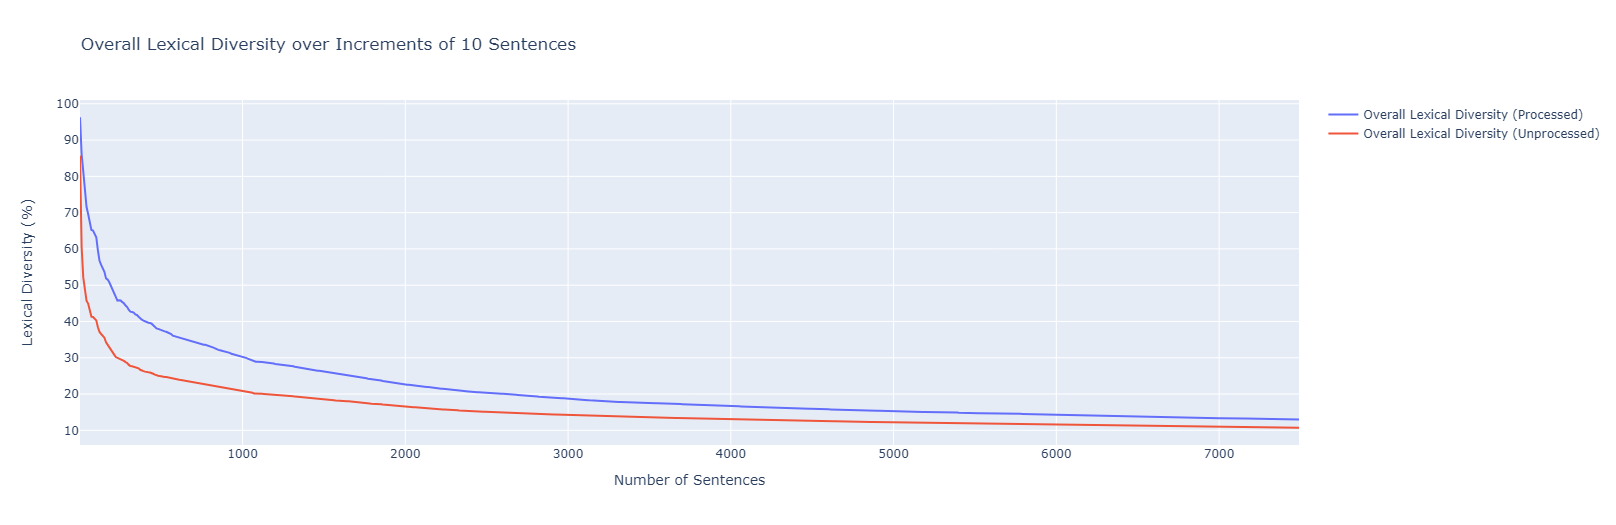

**Processed Overall Lexical Diversity (Blue):** As the batch size increases, we observe a gradual decrease in lexical diversity for the processed version. This trend indicates that when analyzing larger portions of the text together, the processed version becomes less lexically diverse. This is attributed to the removal of high-frequency and stop words during processing, which results in a more focused vocabulary.

**Unprocessed Overall Lexical Diversity (Red):** The red line represents the lexical diversity of the original, unprocessed text. In this case, as the batch size increases, we see a sharp decrease in lexical diversity of the unprocessed text. This decrease suggests that even in the unprocessed text, certain words become more prominent and repetitive when analyzing larger sections of the text.

In summary, overall lexical diversity highlights how text processing affects the diversity of words in a text, particularly as the of a text scale increases. While both processed and unprocessed texts exhibit a decrease in lexical diversity with larger batch sizes, the unprocessed version tends to show a more pronounced decrease due to the inherent diversity in this large text.

In [ ]:
#@title ##Graph Generation {display-mode: "form"}

increment = 10  # n sentences per increment
emma_num_sentences = emma_metrics['num_sentences']
batch_sizes = list(range(1, emma_num_sentences, increment))  # Incrementally increase batch size

ld_unprocessed = []
ld_processed = []

sentences = sent_tokenize(emma_text)
cleaned_sentences = [clean_text(sentence, stop_words) for sentence in sentences]

# Calculate lexical diversities
for batch_size in batch_sizes:
    unprocessed_batch = ' '.join(sentences[:batch_size])
    processed_batch = ' '.join(cleaned_sentences[:batch_size])

    unprocessed_words = unprocessed_batch.lower().split()
    processed_words = processed_batch.lower().split()

    unprocessed_diversity = lexical_diversity(unprocessed_words)
    processed_diversity = lexical_diversity(processed_words)

    ld_unprocessed.append(unprocessed_diversity)
    ld_processed.append(processed_diversity)

# Prepare batch size labels with sentence count
batch_size_labels = [batch_size for batch_size in batch_sizes]

# Convert lexical diversity to percentages
processed_lex_div = [ld * 100 for ld in ld_processed]
unprocessed_lex_div = [ld * 100 for ld in ld_unprocessed]

# Create traces
trace1 = go.Scatter(
    x=batch_size_labels,
    y=processed_lex_div,
    mode='lines',
    name='Overall Lexical Diversity (Cleaned Text)',
)
trace2 = go.Scatter(
    x=batch_size_labels,
    y=unprocessed_lex_div,
    mode='lines',
    name='Overall Lexical Diversity (Unprocessed)',
)

# Layout
layout = go.Layout(
    title='Overall Lexical Diversity over Increments of ' + str(increment) + ' Sentences',
    xaxis=dict(title='Number of Sentences'),
    yaxis=dict(title='Lexical Diversity (%)'),
)

# Figure
fig = go.Figure(data=[trace1, trace2], layout=layout)

# Show plot
fig.show()